In [2]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..')) # to get current alphafold code

from alphafold.partition import *
MS2_hairpin = 'GGAGGAUCACCC'
test_sequences = [ MS2_hairpin,'CCCGCGGCCGGAGGAUCACCCGGCCGCGGG']
test_sequence = test_sequences[0]
(Z, bpp, Z_final ) = partition( test_sequence)

sequence = GGAGGAUCACCC
cutpoint = -----------X
circle   =  False
Z = 4410948.75391


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap( bpp, linewidths=0.1,square=True, vmin=0, vmax=1,ax=ax)

In [4]:
def find_MS2( sequence ):
    i = test_sequence.find( MS2_hairpin )
    j = i + len( MS2_hairpin ) - 1
    assert test_sequence.find( MS2_hairpin, j ) == -1
    return (i,j)

In [5]:
(i,j) = find_MS2( test_sequence )
print bpp[i][j]

0.925630940717


In [6]:
test_sequences = [ MS2_hairpin,
                  'CCCGCGGCC'+MS2_hairpin+'GGCCGCGGG',
                   MS2_hairpin+'AAAAAAAAAAAAA',
                  'AAACGAACGACCA'+MS2_hairpin+'AAACAAAGAAAA',
                  'GGGC'+MS2_hairpin,
                  MS2_hairpin+'GGGC',
                 'AAACCAGCGACGAGGACGACGAGCGACGACGACGAGCGACGACAAACC'+MS2_hairpin,
                 'AAACCAGCGACGAGGACGACGAAACC'+MS2_hairpin+'CAAGAGGAAAAACCCAAAAAAGCAAC',
                 'AAAAGAGAGAAACAAAGACAGACAAA'+MS2_hairpin+'AAAAAGAAACAACCAAAGAAAGAAAG',
                 'CCGCGCCGCGCGCGCGGGCGCGGCGC'+MS2_hairpin+'CGCGCGGCGCGGCGCGCGCGCGGGGG'
                 ]
bpps = []
for test_sequence in test_sequences:
    (Z, bpp, Z_final ) = partition( test_sequence )
    (i,j) = find_MS2( test_sequence )
    bpps.append( bpp )


sequence = GGAGGAUCACCC
cutpoint = -----------X
circle   =  False
Z = 4410948.75391
sequence = CCCGCGGCCGGAGGAUCACCCGGCCGCGGG
cutpoint = -----------------------------X
circle   =  False
Z = 1.2602303299e+22
sequence = GGAGGAUCACCCAAAAAAAAAAAAA
cutpoint = ------------------------X
circle   =  False
Z = 4410948.75391
sequence = AAACGAACGACCAGGAGGAUCACCCAAACAAAGAAAA
cutpoint = ------------------------------------X
circle   =  False
Z = 2.12980134941e+14
sequence = GGGCGGAGGAUCACCC
cutpoint = ---------------X
circle   =  False
Z = 2246567238.82
sequence = GGAGGAUCACCCGGGC
cutpoint = ---------------X
circle   =  False
Z = 2594905446.4
sequence = AAACCAGCGACGAGGACGACGAGCGACGACGACGAGCGACGACAAACCGGAGGAUCACCC
cutpoint = -----------------------------------------------------------X
circle   =  False
Z = 1.71036713409e+36
sequence = AAACCAGCGACGAGGACGACGAAACCGGAGGAUCACCCCAAGAGGAAAAACCCAAAAAAGCAAC
cutpoint = ---------------------------------------------------------------X
circle   =  False
Z = 2.05

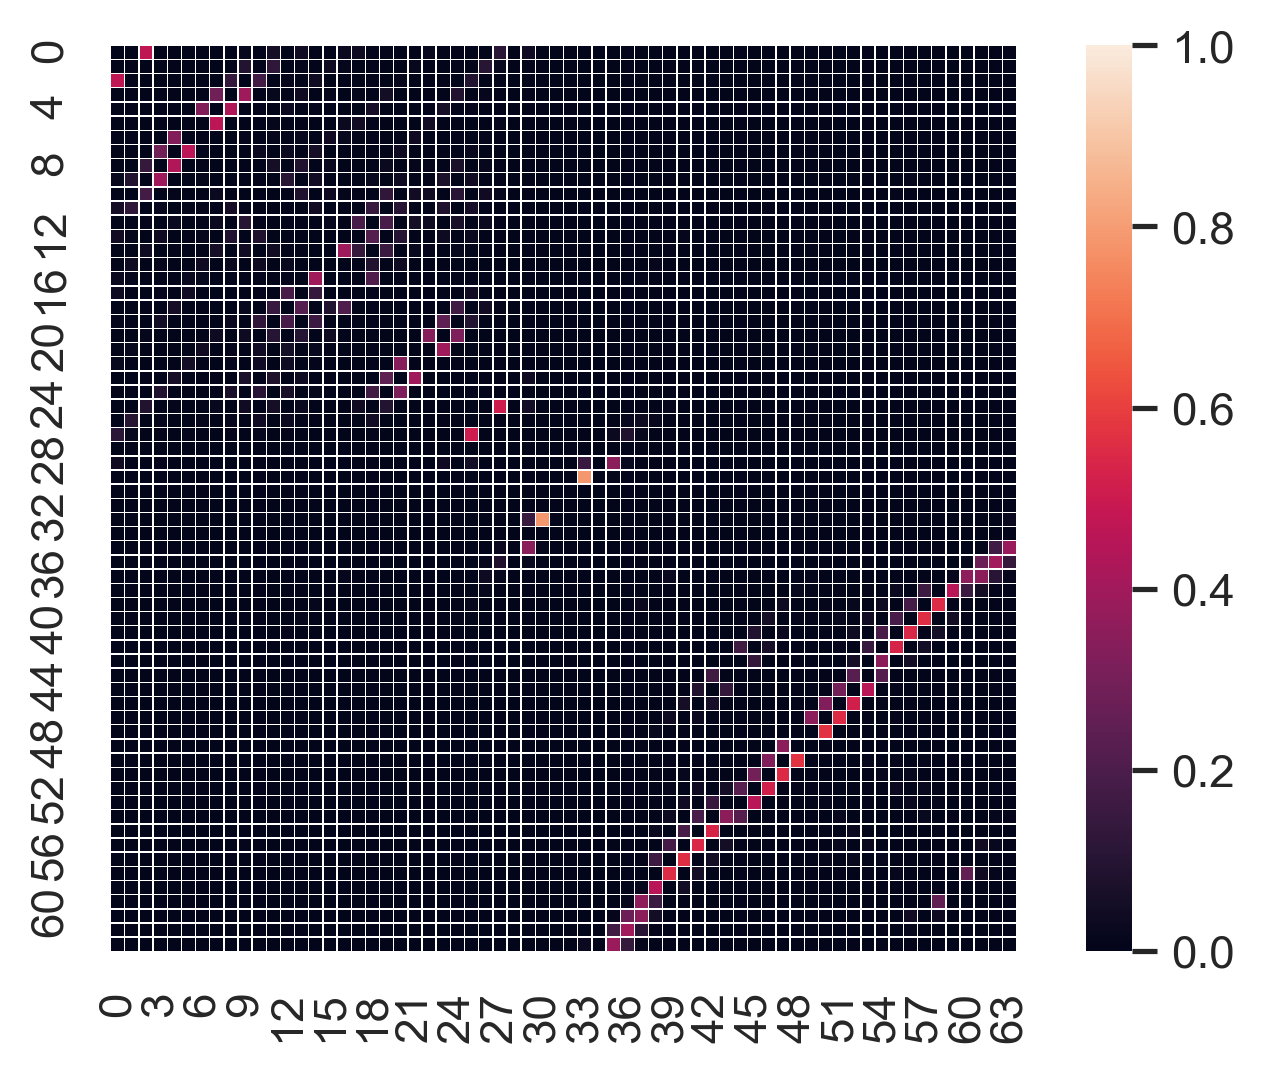

In [205]:
bpp = bpps[9]
f, ax = plt.subplots(dpi=300)
sns.heatmap( bpp, linewidths=0.1,square=True, vmin=0, vmax=1,ax=ax)

In [10]:
params = AlphaFoldParams()
Kd_BPs = [ 2**x for x in range(-40,1)]


In [ ]:
# Note: can skip this and load in through pickle commands
all_bpps = []
for test_sequence in test_sequences:
    bpps = []
    for Kd_BP in Kd_BPs:
        params.Kd_BP = Kd_BP
        (Z, bpp, Z_final ) = partition( test_sequence, params )
        (i,j) = find_MS2( test_sequence )
        bpps.append( bpp[i][j] )
    all_bpps.append( bpps)
print 'BPP:', all_bpps

In [7]:
import pickle
#pickle.dump( all_bpps, open('all_bpps.pickle','wb') )
all_bpps = pickle.load(  open('all_bpps.pickle','rb') )

[Text(0,0.5,u'bpp(MS2), relative to control'), Text(0.5,0,u'Kd_BP (M)')]

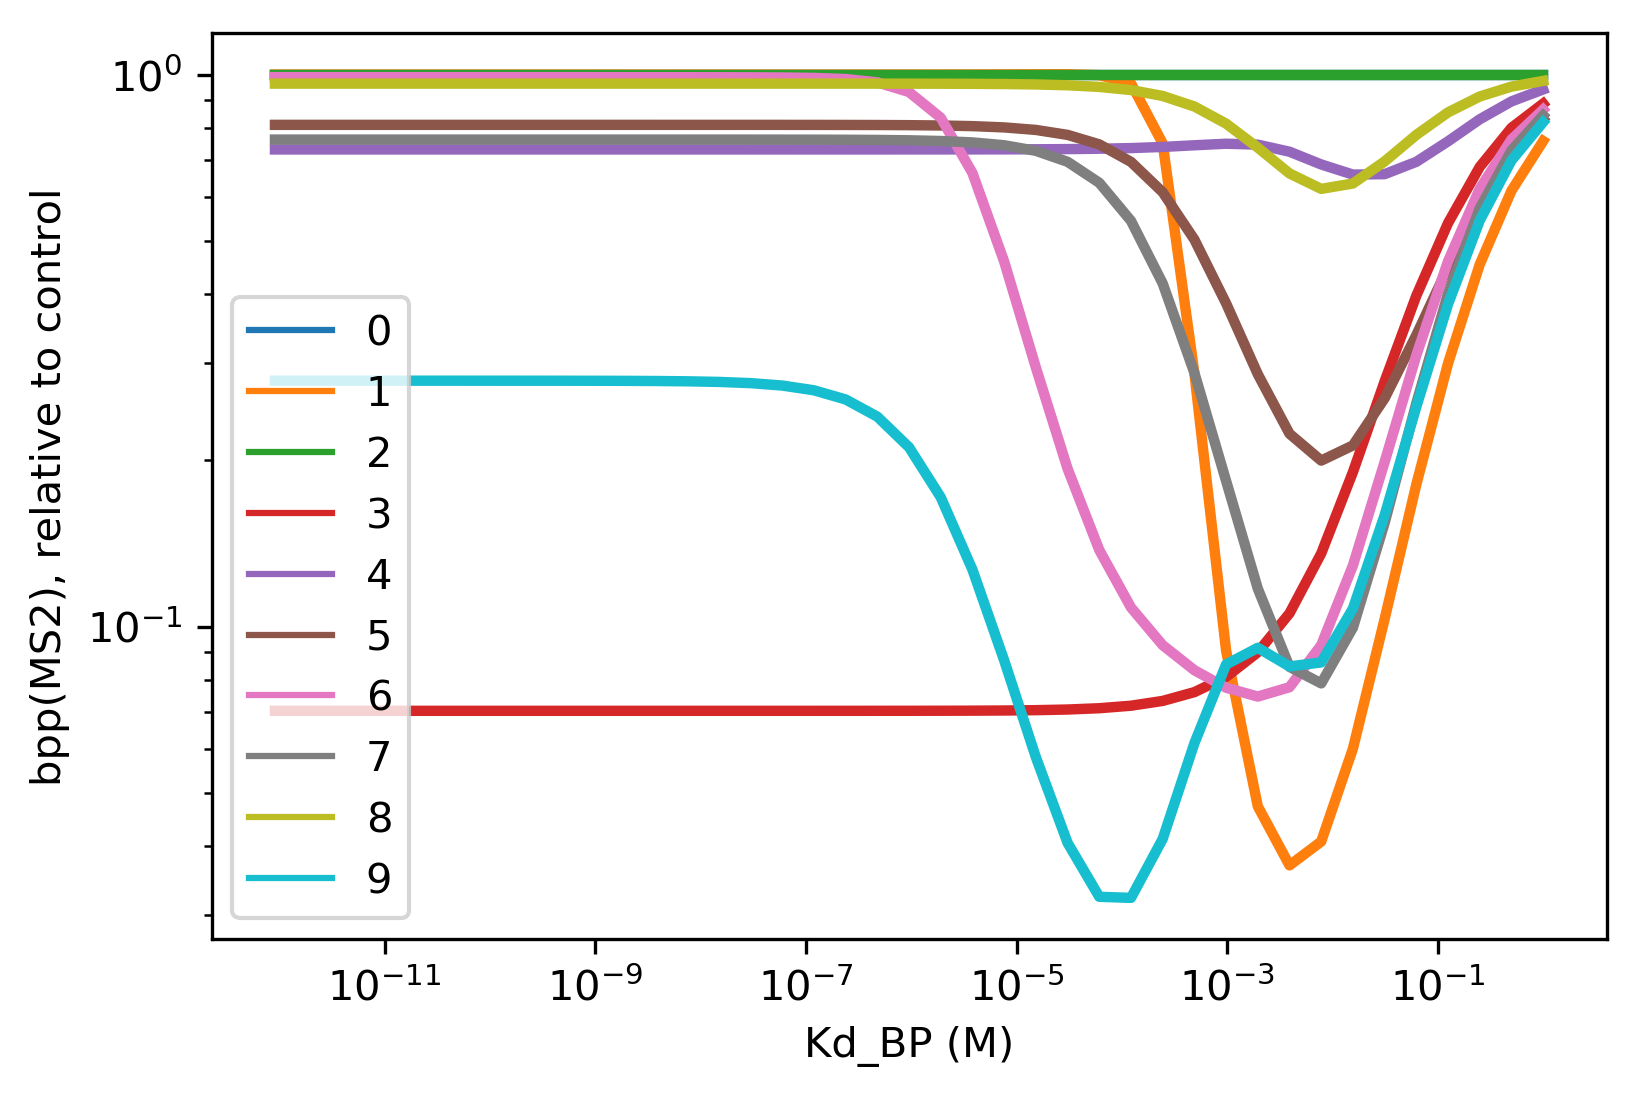

In [11]:
import pandas as pd
import numpy as np
d = np.array(all_bpps)
d = d / np.tile( d[0,:], (d.shape[0],1) ) # bpp relative to "control" sequence
data = pd.DataFrame( d, columns = Kd_BPs )
f, ax = plt.subplots(dpi=300)
g = sns.lineplot( data = data.transpose(), dashes=False,linewidth=2.5,ax=ax )
g.set_xscale( 'log' )
g.set_yscale( 'log' )
g.set(xlabel='Kd_BP (M)',ylabel='bpp(MS2), relative to control' )

In [12]:
#What if I had measurements of the MS2 Kd's, i.e. log( bpp/ bpp_CONTROL ) to within a factor of 2 (~0.5 in log space)
target_bpp_rel = np.zeros( len( test_sequences ))
target_Kd_BP = 0.0002
for (n,test_sequence) in enumerate(test_sequences):
    params.Kd_BP = target_Kd_BP
    (Z, bpp, Z_final ) = partition( test_sequence, params )
    (i,j) = find_MS2( test_sequence )
    target_bpp_rel[n] = bpp[i][j] 
target_bpp_rel = target_bpp_rel / target_bpp_rel[0]
print target_bpp_rel

sequence = GGAGGAUCACCC
cutpoint = -----------X
circle   =  False
Z = 4410948.75391
sequence = CCCGCGGCCGGAGGAUCACCCGGCCGCGGG
cutpoint = -----------------------------X
circle   =  False
Z = 1.2602303299e+22
sequence = GGAGGAUCACCCAAAAAAAAAAAAA
cutpoint = ------------------------X
circle   =  False
Z = 4410948.75391
sequence = AAACGAACGACCAGGAGGAUCACCCAAACAAAGAAAA
cutpoint = ------------------------------------X
circle   =  False
Z = 2.12980134941e+14
sequence = GGGCGGAGGAUCACCC
cutpoint = ---------------X
circle   =  False
Z = 2246567238.82
sequence = GGAGGAUCACCCGGGC
cutpoint = ---------------X
circle   =  False
Z = 2594905446.4
sequence = AAACCAGCGACGAGGACGACGAGCGACGACGACGAGCGACGACAAACCGGAGGAUCACCC
cutpoint = -----------------------------------------------------------X
circle   =  False
Z = 1.71036713409e+36
sequence = AAACCAGCGACGAGGACGACGAAACCGGAGGAUCACCCCAAGAGGAAAAACCCAAAAAAGCAAC
cutpoint = ---------------------------------------------------------------X
circle   =  False
Z = 2.05

[Text(0,0.5,u'log-deviation from mock data with Kd_BP = 0.000200'),
 Text(0.5,0,u'Kd_BP (M)')]

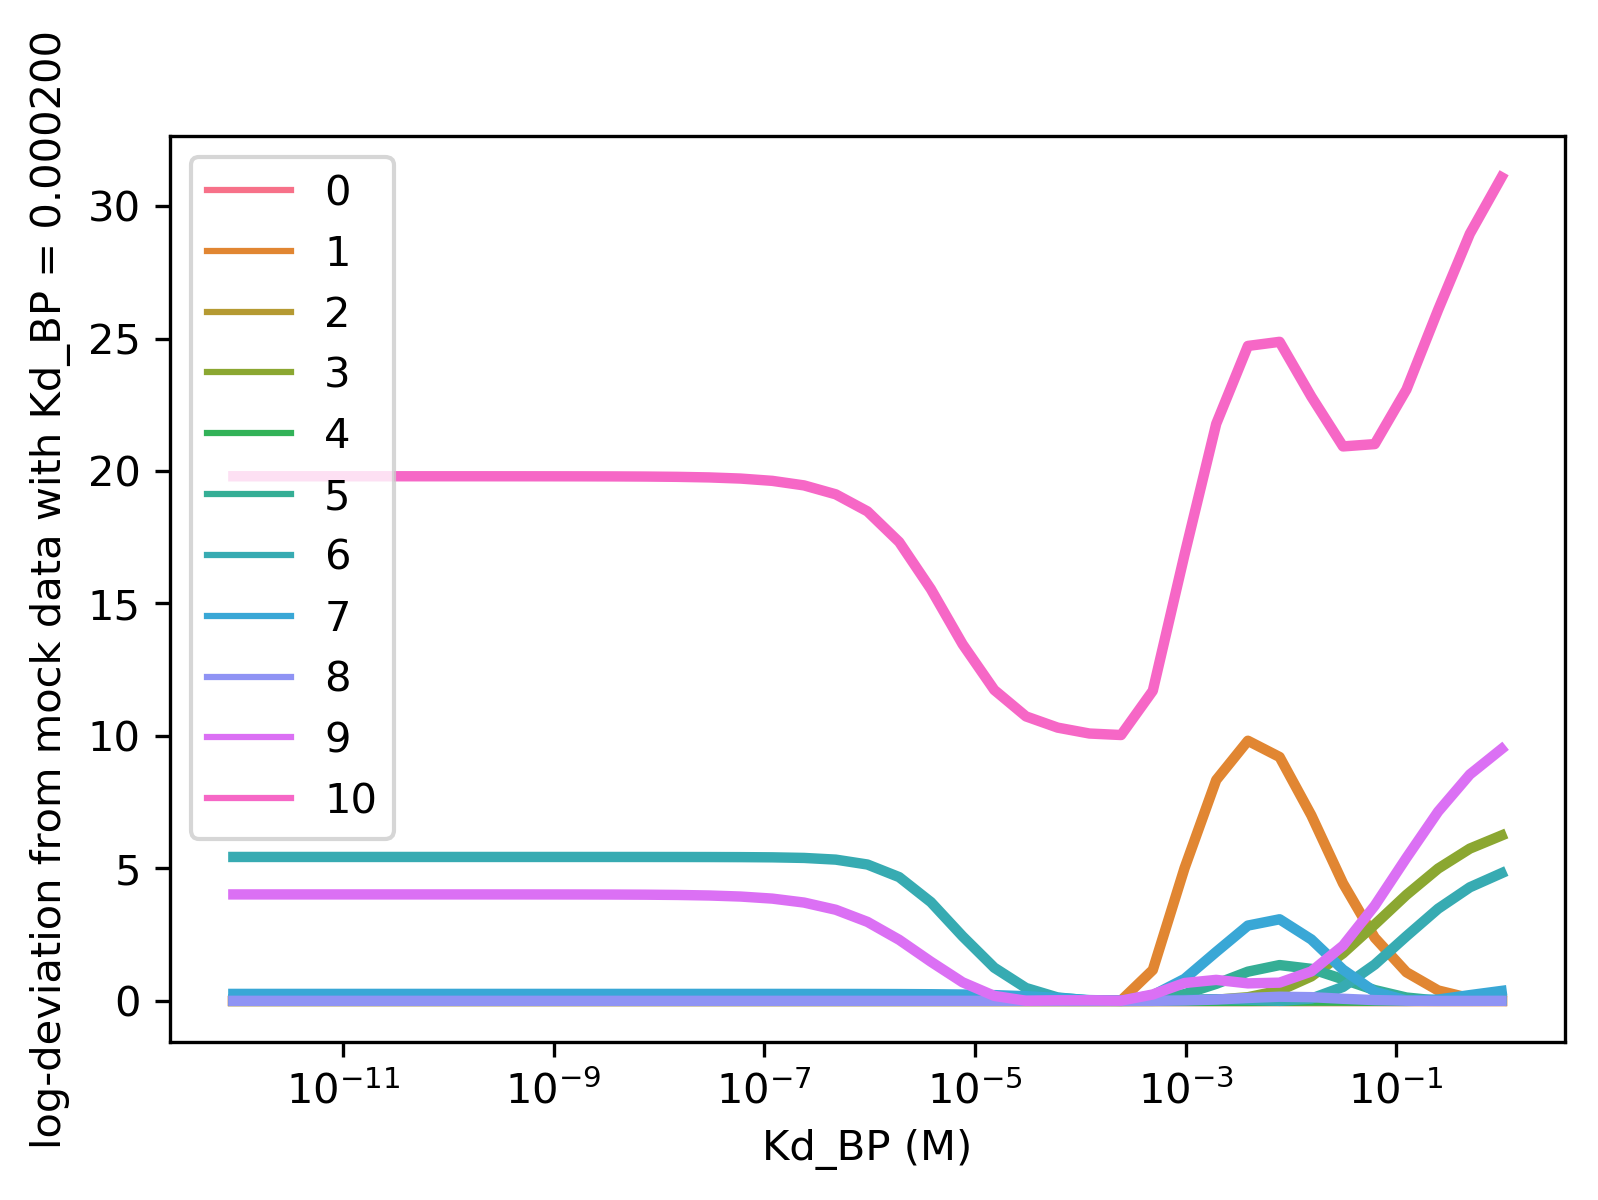

In [14]:
jitter = 0  # random jitter (units of kT)
log_expt_bpp_rel = np.log(target_bpp_rel) +  jitter*np.random.randn( len(target_bpp_rel) )
log_deviation = np.log( d )  - np.tile(log_expt_bpp_rel, [d.shape[1],1]).transpose()
error = log_deviation**2
error_sum = np.sum( error, axis=0, keepdims=True )+10
f, ax = plt.subplots(dpi=300)
data = pd.DataFrame( np.concatenate( [error, error_sum] ), columns = Kd_BPs ) #, index = test_sequences )

g = sns.lineplot( data = data.transpose(), dashes=False,linewidth=2.5 )
g.set_xscale( 'log' )
g.set_yscale( 'linear' )
g.set(xlabel='Kd_BP (M)',ylabel='log-deviation from mock data with Kd_BP = %f' % target_Kd_BP )

In [179]:
x = np.tile(np.log( target_bpp_rel ), [d.shape[1],1])
print x.shape
print d.shape
print len( all_bpps )

(41, 10)
(20, 41)
20


In [146]:
print error.shape 
print error_sum.shape

(10, 41)
(1, 41)


In [171]:
sequence_labels = ['Seq %d' % i for i in range(len(test_sequences))]
print sequence_labels

['Seq 0', 'Seq 1', 'Seq 2', 'Seq 3', 'Seq 4', 'Seq 5', 'Seq 6', 'Seq 7', 'Seq 8', 'Seq 9']


In [18]:
import cProfile
import re
cProfile.run( 're.compile("../alphafold.py -s CCGCGCCGCGCGCGCGGGCGCGGCGC")')

         443 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 re.py:192(compile)
        1    0.000    0.000    0.000    0.000 re.py:230(_compile)
        1    0.000    0.000    0.000    0.000 sre_compile.py:433(_compile_info)
        2    0.000    0.000    0.000    0.000 sre_compile.py:546(isstring)
        1    0.000    0.000    0.000    0.000 sre_compile.py:552(_code)
        1    0.000    0.000    0.000    0.000 sre_compile.py:567(compile)
        1    0.000    0.000    0.000    0.000 sre_compile.py:64(_compile)
       45    0.000    0.000    0.000    0.000 sre_parse.py:150(append)
        1    0.000    0.000    0.000    0.000 sre_parse.py:152(getwidth)
        1    0.000    0.000    0.000    0.000 sre_parse.py:190(__init__)
       48    0.000    0.000    0.000    0.000 sre_parse.py:194